# Artificial Neural Network (ANN) Project – Student Exit Prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn

print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Scikit-learn:", sklearn.__version__)


In [ ]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


In [ ]:
from tensorflow.keras import layers

# Recommended way: start with Input layer
model = keras.Sequential([
    layers.Input(shape=(4,)),           # Explicit Input layer
    layers.Dense(16, activation="relu"),
    layers.Dense(3, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("✅ Model built successfully (no warnings)!")


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
# Step 2: Load dataset
dataset = pd.read_csv("Churn_Modelling.csv")

print(dataset.shape)   # should be (10000, 14)
dataset.head()         # preview first 5 rows


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("First row of X:", X[0])
print("First 10 values of y:", y[:10])


X shape: (10000, 10)
y shape: (10000,)
First row of X: [619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
First 10 values of y: [1 0 1 0 0 1 0 1 0 0]


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Encode Gender (Male/Female → 0/1)
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])  

# OneHot Encode Geography (France/Spain/Germany)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1])],  # column 1 = Geography
    remainder="passthrough"
)
X = ct.fit_transform(X)

# Convert to numpy array
X = np.array(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Feature Scaling (important for NN)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 12)
X_test shape: (2000, 12)
y_train shape: (8000,)
y_test shape: (2000,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize the ANN
model = Sequential()

# Input + First hidden layer
model.add(Input(shape=(12,)))  # 12 input features
model.add(Dense(units=6, activation='relu'))  # 6 neurons, ReLU activation

# Second hidden layer
model.add(Dense(units=6, activation='relu'))

# Output layer (binary classification: Exited or Not)
model.add(Dense(units=1, activation='sigmoid'))  # sigmoid → output between 0 and 1

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ ANN model is built and compiled successfully!")


✅ ANN model is built and compiled successfully!


In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=10,
    epochs=100,
    validation_split=0.2,   # keep aside 20% of training data for validation
    verbose=1
)


Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7773 - loss: 0.5310 - val_accuracy: 0.7969 - val_loss: 0.4788
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7973 - loss: 0.4586 - val_accuracy: 0.8062 - val_loss: 0.4457
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8108 - loss: 0.4349 - val_accuracy: 0.8156 - val_loss: 0.4313
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8161 - loss: 0.4248 - val_accuracy: 0.8125 - val_loss: 0.4246
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8194 - loss: 0.4184 - val_accuracy: 0.8150 - val_loss: 0.4210
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8239 - loss: 0.4143 - val_accuracy: 0.8288 - val_loss: 0.4158
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8275 - loss: 0.4099 - val_accuracy: 0.8275 - val_loss: 0.4108
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8298 - loss: 0.4025 - val_accu

In [12]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")



Test Accuracy: 0.86


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Confusion Matrix:
 [[1527   68]
 [ 215  190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.47      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



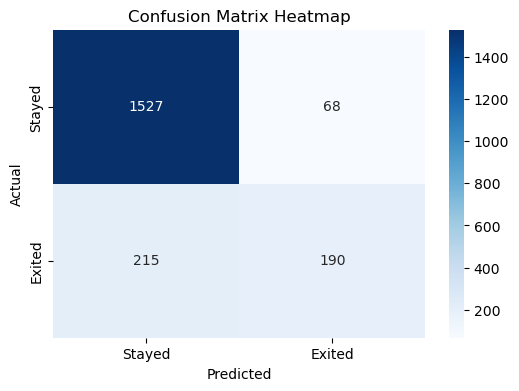

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Exited"], yticklabels=["Stayed", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


#conclusion
### Summary
The model achieved ~86% accuracy in predicting customer churn.  
It performs well at identifying non-churners but could be improved for churners.
